In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
dataset = dataset.dropna()
mapping = {'Yes': 1, 'No': 0}
dataset['Churn'] = dataset['Churn'].replace(mapping)
y = dataset['Churn']
x = dataset.drop(['customerID', 'tenure', 'Partner', 'gender', 'PaperlessBilling', 'Churn'], axis = 1)

# Classify the dataset-> turn string into classifier 
# Define mappings from category names to numbers
mapping = {'Yes': 1, 'No': 0}
x['Dependents'] = x['Dependents'].replace(mapping)
x['PhoneService'] = x['PhoneService'].replace(mapping)

mapping = {'Yes': 1, 'No': 0, 'No phone service' : 0}
x['MultipleLines'] = x['MultipleLines'].replace(mapping)

mapping = {'No': 0, 'DSL': 1, 'Fiber optic' : 2}
x['InternetService'] = x['InternetService'].replace(mapping)

mapping = {'Yes': 1, 'No': 0, 'No internet service' : 0}
x['OnlineSecurity'] = x['OnlineSecurity'].replace(mapping)
x['DeviceProtection'] = x['DeviceProtection'].replace(mapping)
x['TechSupport'] = x['TechSupport'].replace(mapping)
x['StreamingTV'] = x['StreamingTV'].replace(mapping)
x['StreamingMovies'] = x['StreamingMovies'].replace(mapping)
x['OnlineBackup'] = x['OnlineBackup'].replace(mapping)


mapping = {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)' : 2, 'Credit card (automatic)' : 3}
x['PaymentMethod'] = x['PaymentMethod'].replace(mapping)


mapping = {'Month-to-month': 0, 'One year': 1, 'Two year' : 2}
x['Contract'] = x['Contract'].replace(mapping)
x['TotalCharges'] = pd.to_numeric(x['TotalCharges'], errors='coerce')

nan_rows = x[x['TotalCharges'].isna()].index

x = x.drop(nan_rows)
y = y.drop(nan_rows)

print(x)


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(x)
X = pd.DataFrame(data = X_rescaled, columns = x.columns)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

max_iterations = [500, 800, 1000]
hidden_layer_sizes = [(5, 7), (7, 5), (7, 13), (13, 10), (14,10), (10,10), (15,10)]
learning_rates = 0.15 * np.arange(1, 3)

param_grid = dict(learning_rate_init=learning_rates, hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iterations)

mlp = MLPClassifier(solver='sgd', random_state=42, activation='logistic')

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3)  

grid.fit(X_train, y_train)

mlp_optimal = MLPClassifier(**grid.best_params_)
mlp_optimal.fit(X_train, y_train)


In [89]:
print("Optimal Hyperparameters : ", grid.best_params_)
print("Optimal Accuracy: ", mlp_optimal.score(X, y))

Optimal Hyperparameters :  {'hidden_layer_sizes': (13, 10), 'learning_rate_init': 0.3, 'max_iter': 500}
Optimal Accuracy:  0.7342150170648464


In [105]:
clf = MLPClassifier(hidden_layer_sizes=(15, 10 , 2), max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7341862117981521


In [106]:
lr_pred= clf.predict(X_test)
report = classification_report(y_test,lr_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       1.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.87      0.50      0.42      1407
weighted avg       0.80      0.73      0.62      1407



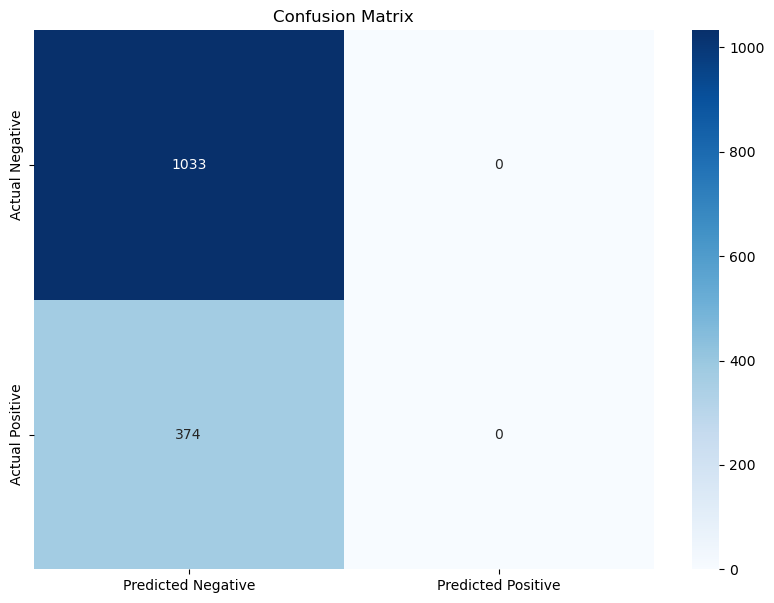

In [107]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], 
                     index=['Actual Negative', 'Actual Positive'])
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [93]:
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7825159914712153


In [94]:
lr_pred= logistic_regression.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



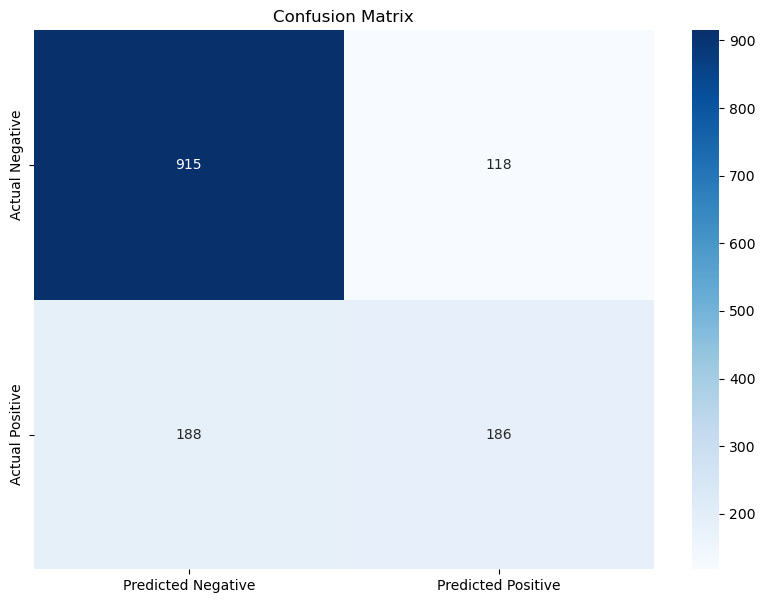

In [95]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], 
                     index=['Actual Negative', 'Actual Positive'])
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [96]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7185501066098081


In [97]:
lr_pred= clf.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1033
           1       0.47      0.49      0.48       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



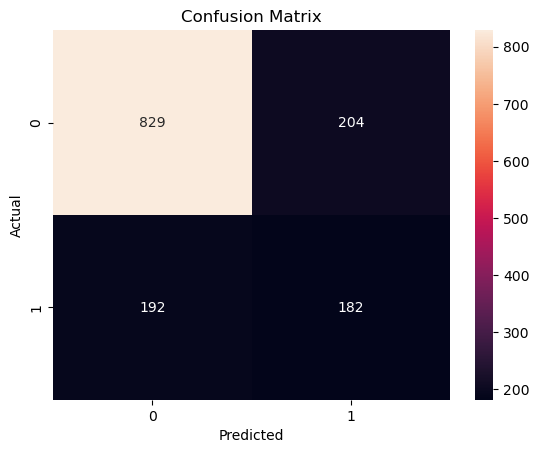

In [98]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

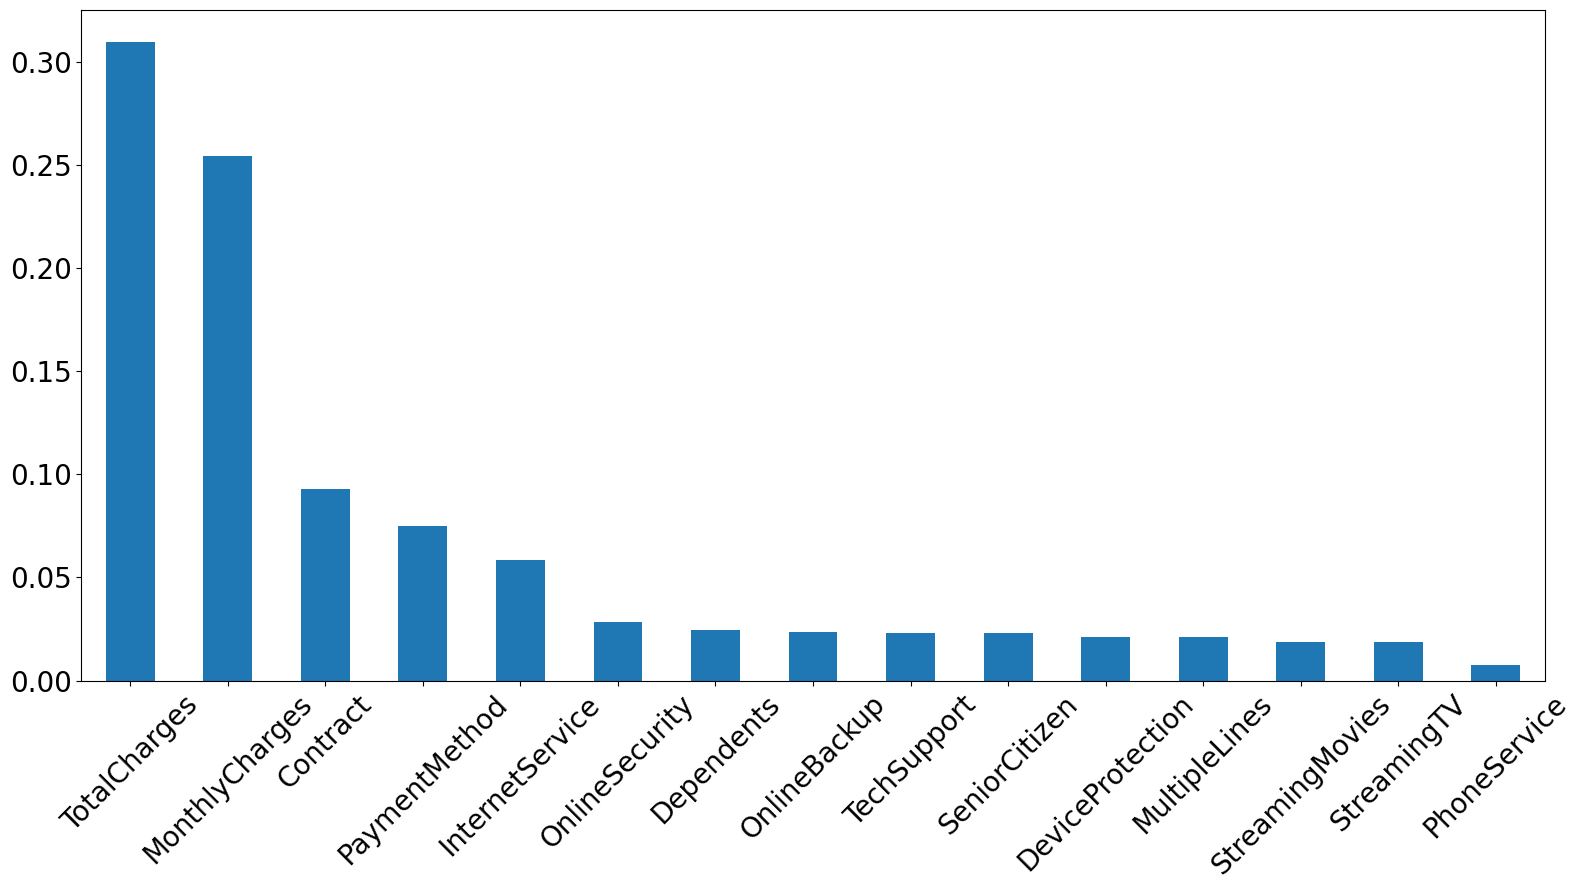

In [99]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
f_importances = pd.Series(importances, X.columns)
f_importances.sort_values(ascending=False, inplace=True) 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=20)
plt.tight_layout()
plt.show()

In [100]:
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7739872068230277


In [101]:
lr_pred= clf.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.62      0.39      0.48       374

    accuracy                           0.77      1407
   macro avg       0.71      0.65      0.67      1407
weighted avg       0.76      0.77      0.76      1407



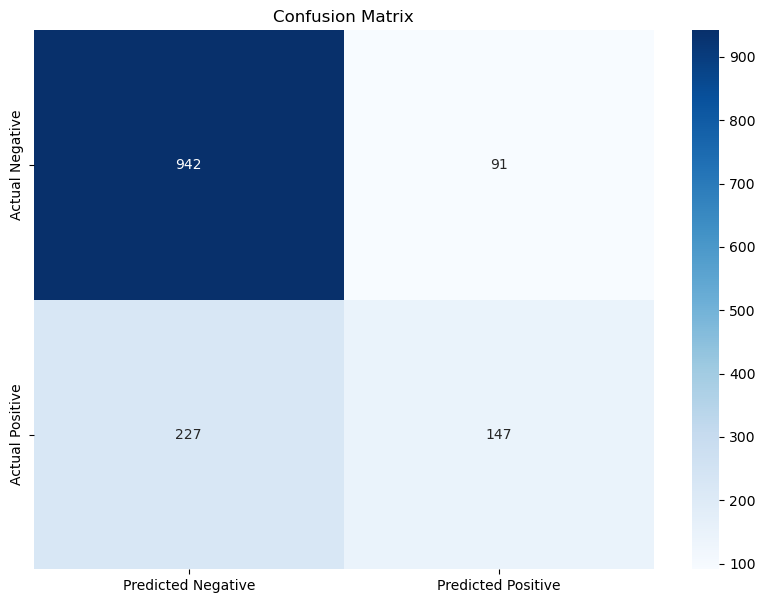

In [102]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], 
                     index=['Actual Negative', 'Actual Positive'])
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

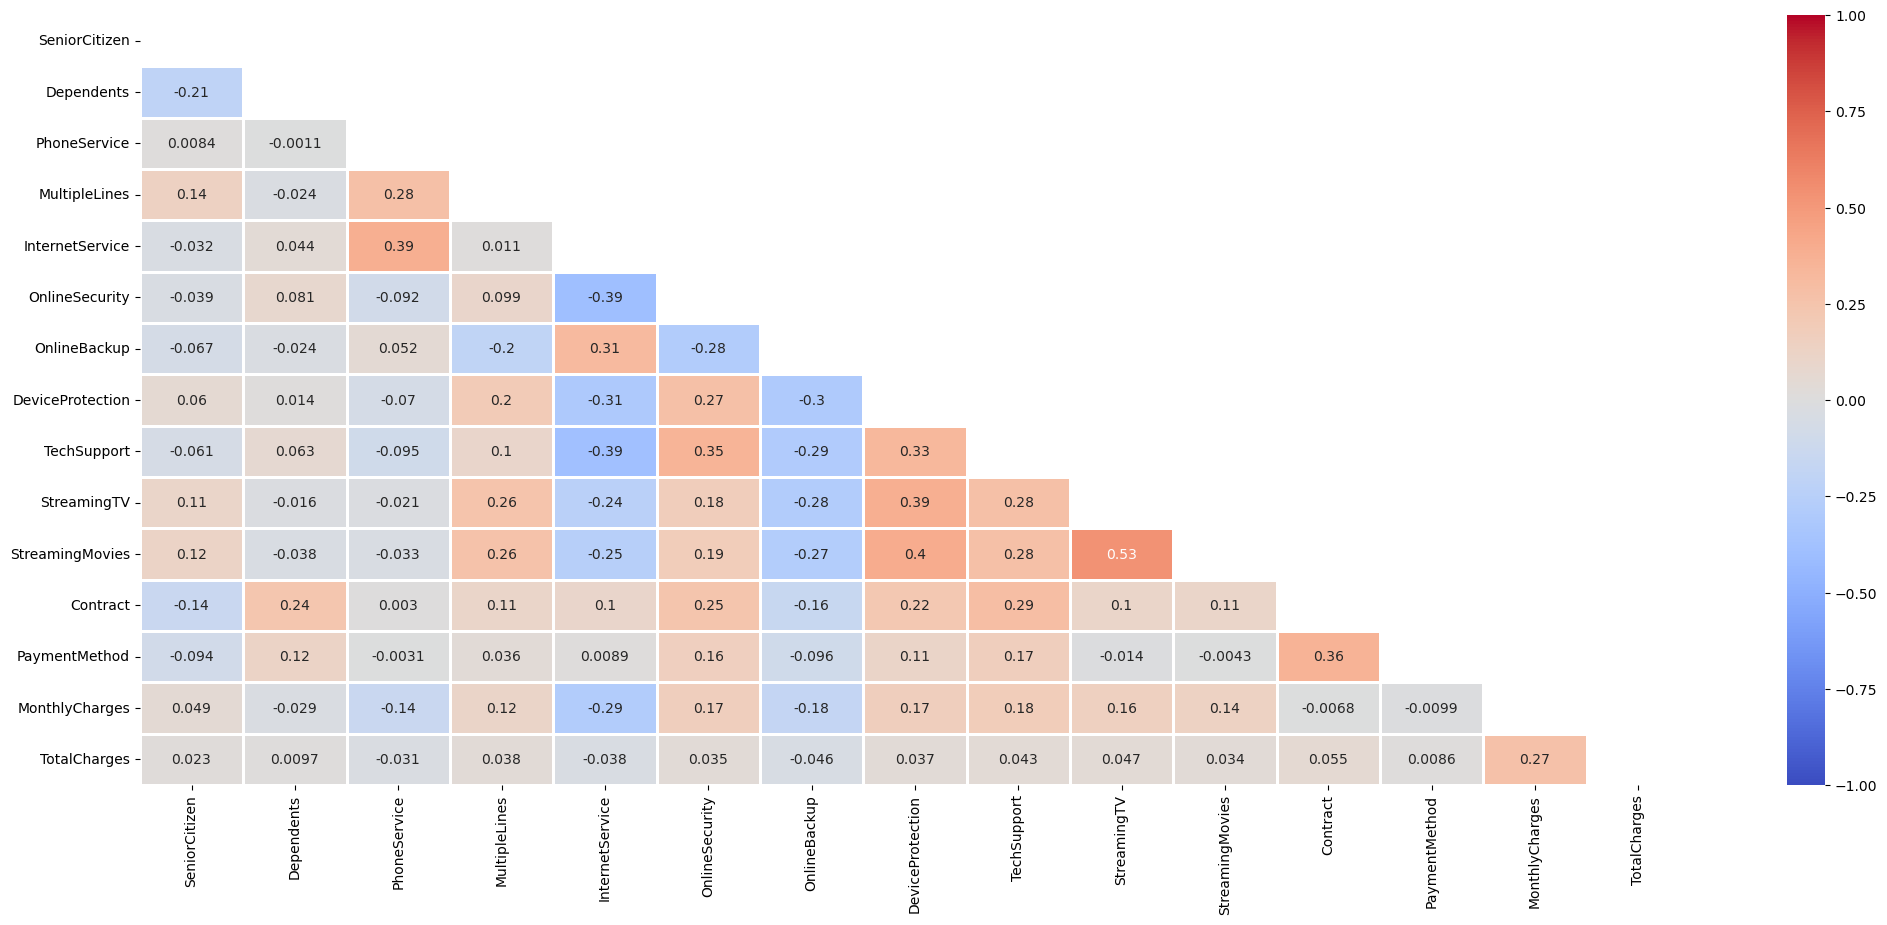

In [103]:
plt.figure(figsize=(25, 10))

corr = x.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=2, cmap='coolwarm', vmin=-1, vmax=1)